In [1]:
import geopandas as gpd
%matplotlib inline

In [2]:
chile = gpd.read_file('data/division_comunal_geo_ide_1/', encoding='utf-8')

In [3]:
chile.head()

NOM_REG NOM_PROV     NOM_COM     SHAPE_LENG  DIS_ELEC  \
0  Región de La Araucanía  Malleco     Ercilla  170675.595438        48   
1  Región de La Araucanía  Malleco   Lonquimay  346907.195437        49   
2  Región de La Araucanía  Malleco  Los Sauces  169844.122286        48   
3  Región de La Araucanía  Malleco      Lumaco  227705.219204        48   
4  Región de La Araucanía  Malleco       Purén  137030.480474        48   

   CIR_SENA  COD_COMUNA     SHAPE_Le_1    SHAPE_Area  \
0        14        9204  170675.595706  4.979025e+08   
1        14        9205  346907.195899  3.932854e+09   
2        14        9206  169844.122239  8.519730e+08   
3        14        9207  227705.218806  1.112643e+09   
4        14        9208  137030.480353  4.654760e+08   

                                            geometry  
0  POLYGON ((-72.5231622316139 -37.94412233799464...  
1  POLYGON ((-71.34595698743479 -38.0886599063557...  
2  POLYGON ((-72.91458811671856 -37.8395074881169...  
3  POLYGON ((-72.88079192476494 -38.0750506676126...  
4  POLYGON ((-73.03073936806268 -37.8402500719441...

In [4]:
biobio = chile[chile['NOM_REG'] == 'Región del Bío-Bío']


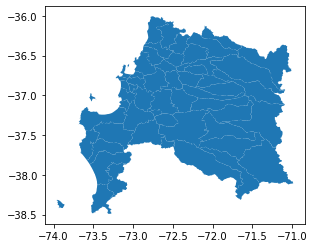

In [5]:
biobio.plot()

In [ ]:
biobio.shape

In [6]:
biobio = biobio[biobio['NOM_COM'] != 'Lebu']
biobio = biobio[biobio['NOM_COM'] != 'Coronel']
biobio = biobio[biobio['NOM_COM'] != 'Talcahuano']

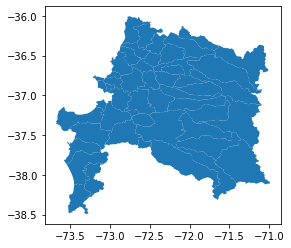

In [7]:
biobio.plot()

In [6]:
biobio['NOM_COM'].unique()

array(['Mulchén', 'Nacimiento', 'Negrete', 'Quilaco', 'Quilleco',
       'San Rosendo', 'Santa Bárbara', 'Tucapel', 'Yumbel', 'Concepción',
       'Florida', 'Hualpén', 'Hualqui', 'Lota', 'Penco', 'Santa Juana',
       'Tomé', 'Bulnes', 'Chillán', 'Chillán Viejo', 'Cobquecura',
       'Coelemu', 'Chiguayante', 'San Pedro de la Paz', 'El Carmen',
       'Ninhue', 'Ñiquén', 'Pemuco', 'Pinto', 'Portezuelo', 'Quillón',
       'Quirihue', 'Ranquil', 'San Carlos', 'San Fabián', 'San Ignacio',
       'San Nicolás', 'Treguaco', 'Yungay', 'Coihueco', 'Arauco',
       'Cañete', 'Contulmo', 'Curanilahue', 'Los Alamos', 'Tirúa',
       'Alto Biobío', 'Antuco', 'Cabrero', 'Laja', 'Los Angeles'],
      dtype=object)

In [ ]:
biobio.shape

In [ ]:
biobio.plot()

In [7]:
biobio.loc[:, 'centroid'] = biobio.loc[:,'geometry'].centroid

In [ ]:
biobio.head()

In [8]:
def assign_x(centroid):
    return float(centroid.x)

def assign_y(centroid):
    return float(centroid.y)
biobio.loc[:, 'centroid_x'] = biobio['centroid'].apply(assign_x)
biobio.loc[:, 'centroid_y'] = biobio['centroid'].apply(assign_y)

In [9]:
biobio.drop('centroid',  axis=1, inplace=True)

In [10]:
biobio.head()

NOM_REG NOM_PROV     NOM_COM     SHAPE_LENG  DIS_ELEC  \
120  Región del Bío-Bío  Bío-Bío     Mulchén  311947.908393        47   
121  Región del Bío-Bío  Bío-Bío  Nacimiento  191416.344754        47   
122  Región del Bío-Bío  Bío-Bío     Negrete   77213.548250        47   
123  Región del Bío-Bío  Bío-Bío     Quilaco  282388.766764        47   
124  Región del Bío-Bío  Bío-Bío    Quilleco  240420.559462        47   

     CIR_SENA  COD_COMUNA     SHAPE_Le_1    SHAPE_Area  \
120        13        8305  311947.908133  1.922636e+09   
121        13        8306  191416.344324  9.117771e+08   
122        13        8307   77213.548309  1.556746e+08   
123        13        8308  282388.767338  1.126256e+09   
124        13        8309  240420.559976  1.121994e+09   

                                              geometry  centroid_x  centroid_y  
120  POLYGON ((-72.43334352332262 -37.5619680689156...  -72.097023  -37.838358  
121  POLYGON ((-72.72013571650028 -37.3025229857047...  -72.823564  -37.485523  
122  POLYGON ((-72.59553424428385 -37.5310507766004...  -72.576349  -37.608089  
123  POLYGON ((-72.07607421008562 -37.6530209035402...  -71.704976  -37.960748  
124  POLYGON ((-72.03043817152037 -37.2290063644018...  -71.861352  -37.436655

In [11]:
biobio.reset_index(drop=True, inplace = True)
biobio.loc[:, 'id'] = biobio.index.values
biobio.head()

NOM_REG NOM_PROV     NOM_COM     SHAPE_LENG  DIS_ELEC  CIR_SENA  \
0  Región del Bío-Bío  Bío-Bío     Mulchén  311947.908393        47        13   
1  Región del Bío-Bío  Bío-Bío  Nacimiento  191416.344754        47        13   
2  Región del Bío-Bío  Bío-Bío     Negrete   77213.548250        47        13   
3  Región del Bío-Bío  Bío-Bío     Quilaco  282388.766764        47        13   
4  Región del Bío-Bío  Bío-Bío    Quilleco  240420.559462        47        13   

   COD_COMUNA     SHAPE_Le_1    SHAPE_Area  \
0        8305  311947.908133  1.922636e+09   
1        8306  191416.344324  9.117771e+08   
2        8307   77213.548309  1.556746e+08   
3        8308  282388.767338  1.126256e+09   
4        8309  240420.559976  1.121994e+09   

                                            geometry  centroid_x  centroid_y  \
0  POLYGON ((-72.43334352332262 -37.5619680689156...  -72.097023  -37.838358   
1  POLYGON ((-72.72013571650028 -37.3025229857047...  -72.823564  -37.485523   
2  POLYGON ((-72.59553424428385 -37.5310507766004...  -72.576349  -37.608089   
3  POLYGON ((-72.07607421008562 -37.6530209035402...  -71.704976  -37.960748   
4  POLYGON ((-72.03043817152037 -37.2290063644018...  -71.861352  -37.436655   

   id  
0   0  
1   1  
2   2  
3   3  
4   4

In [12]:
biobio.loc[:, 'centroid_manual_x'] = biobio.loc[:, 'centroid_x']
biobio.loc[:, 'centroid_manual_y'] = biobio.loc[:, 'centroid_y']
biobio.loc[:, 'add_line'] = False
biobio.loc[:, 'line_loc'] = 'down'
biobio.head()

NOM_REG NOM_PROV     NOM_COM     SHAPE_LENG  DIS_ELEC  CIR_SENA  \
0  Región del Bío-Bío  Bío-Bío     Mulchén  311947.908393        47        13   
1  Región del Bío-Bío  Bío-Bío  Nacimiento  191416.344754        47        13   
2  Región del Bío-Bío  Bío-Bío     Negrete   77213.548250        47        13   
3  Región del Bío-Bío  Bío-Bío     Quilaco  282388.766764        47        13   
4  Región del Bío-Bío  Bío-Bío    Quilleco  240420.559462        47        13   

   COD_COMUNA     SHAPE_Le_1    SHAPE_Area  \
0        8305  311947.908133  1.922636e+09   
1        8306  191416.344324  9.117771e+08   
2        8307   77213.548309  1.556746e+08   
3        8308  282388.767338  1.126256e+09   
4        8309  240420.559976  1.121994e+09   

                                            geometry  centroid_x  centroid_y  \
0  POLYGON ((-72.43334352332262 -37.5619680689156...  -72.097023  -37.838358   
1  POLYGON ((-72.72013571650028 -37.3025229857047...  -72.823564  -37.485523   
2  POLYGON ((-72.59553424428385 -37.5310507766004...  -72.576349  -37.608089   
3  POLYGON ((-72.07607421008562 -37.6530209035402...  -71.704976  -37.960748   
4  POLYGON ((-72.03043817152037 -37.2290063644018...  -71.861352  -37.436655   

   id  centroid_manual_x  centroid_manual_y  add_line line_loc  
0   0         -72.097023         -37.838358     False     down  
1   1         -72.823564         -37.485523     False     down  
2   2         -72.576349         -37.608089     False     down  
3   3         -71.704976         -37.960748     False     down  
4   4         -71.861352         -37.436655     False     down

# MANUAL CENTROIDS

In [13]:
biobio.loc[13, 'centroid_manual_x'] = -73.19470720619215
biobio.loc[13, 'centroid_manual_y'] = -37.13201571832683

biobio.loc[13, 'add_line'] = False
biobio.loc[13, 'line_loc'] = 'right'

In [14]:
biobio.loc[26, 'centroid_manual_x'] = -72.06804310767384
biobio.loc[26, 'centroid_manual_y'] = -36.2231461440657

In [15]:
biobio.loc[31, 'centroid_manual_x'] = -72.53895343646452
biobio.loc[31, 'centroid_manual_y'] = -36.1627659414129

In [16]:
biobio.loc[20, 'centroid_manual_x'] = -72.78541117863536
biobio.loc[20, 'centroid_manual_y'] = -36.30121608933768

In [17]:
biobio.loc[21, 'centroid_manual_x'] = -72.89983798750039
biobio.loc[21, 'centroid_manual_y'] = -36.46066139037599

In [18]:
biobio.loc[18, 'centroid_manual_x'] = -72.02403279657192
biobio.loc[18, 'centroid_manual_y'] = -36.56854387519827

In [19]:
biobio.loc[22, 'centroid_manual_x'] = -73.11328813065357
biobio.loc[22, 'centroid_manual_y'] = -36.98802202370379

biobio.loc[22, 'add_line'] = True
biobio.loc[22, 'line_loc'] = 'up'

In [20]:
biobio.loc[23, 'centroid_manual_x'] = -73.25632164173484
biobio.loc[23, 'centroid_manual_y'] = -36.854320539197886

biobio.loc[23, 'add_line'] = True
biobio.loc[23, 'line_loc'] = 'right'

In [21]:
biobio.loc[11, 'centroid_manual_x'] = -73.26732421951033
biobio.loc[11, 'centroid_manual_y'] = -36.72038483392178

biobio.loc[11, 'add_line'] = True
biobio.loc[11, 'line_loc'] = 'right'

In [22]:
biobio.loc[14, 'centroid_manual_x'] = -73.07587936621692
biobio.loc[14, 'centroid_manual_y'] = -36.65685992884627

biobio.loc[14, 'add_line'] = True
biobio.loc[14, 'line_loc'] = 'right'

In [24]:
biobio.loc[49, 'centroid_manual_y'] = -37.36303894687814

In [25]:
biobio.loc[24, 'centroid_manual_x'] = -71.80591122640529

In [23]:
biobio.loc[32, 'centroid_manual_y'] = -36.6956869399083

In [26]:
biobio_geo_ori = biobio.loc[:, 'geometry'].copy()

In [27]:
biobio['geometry'] = biobio_geo_ori.simplify(0.001, preserve_topology=True)

In [28]:
biobio.to_file('data/biobio.geojson', driver='GeoJSON')

In [29]:
biobio_simple = biobio.copy()
biobio_simple['geometry'] = biobio_simple['geometry'].simplify(0.02, preserve_topology=True)
biobio_simple.to_file('data/biobio_simplified.geojson', driver='GeoJSON')